Demo on finding the fundemental matrix between two image

In [28]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

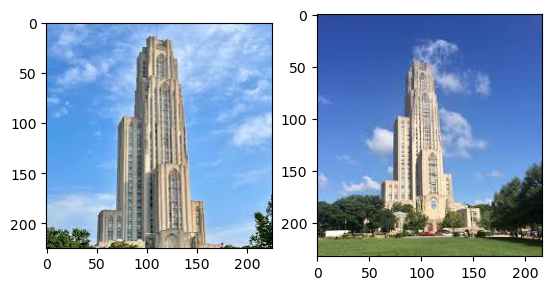

In [29]:
cathy1 = cv2.imread(os.path.relpath('../../Data/Cathy1.jpeg'), cv2.IMREAD_COLOR)
cathy1 = cv2.cvtColor(cathy1,cv2.COLOR_BGR2RGB)

cathy2 = cv2.imread(os.path.relpath('../../Data/Cathy2.jpeg'), cv2.IMREAD_COLOR)
cathy2 = cv2.cvtColor(cathy2,cv2.COLOR_BGR2RGB)

plt.subplot(121); plt.imshow(cathy1)
plt.subplot(122); plt.imshow(cathy2)


In [30]:
# Convert to grayscale
gray1 = cv2.cvtColor(cathy1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(cathy2, cv2.COLOR_BGR2GRAY)
# Initiate ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(cathy1, None)
kp2, des2 = orb.detectAndCompute(cathy2, None)

# Create a BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Extract the matched keypoints
pts1 = []
pts2 = []

for match in matches:
    pts1.append(kp1[match.queryIdx].pt)
    pts2.append(kp2[match.trainIdx].pt)

# Convert to numpy arrays
pts1 = np.array(pts1)
pts2 = np.array(pts2)



In [31]:

H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 2.5)
matches2=[]
for i in range(0,mask.shape[0]):
    if(mask[i]==1):
        matches2.append(matches[i])
        
# Extract the matched keypoints
pts1 = []
pts2 = []

for match in matches2:
    pts1.append(kp1[match.queryIdx].pt)
    pts2.append(kp2[match.trainIdx].pt)

# Convert to numpy arrays
pts1 = np.array(pts1)
pts2 = np.array(pts2)

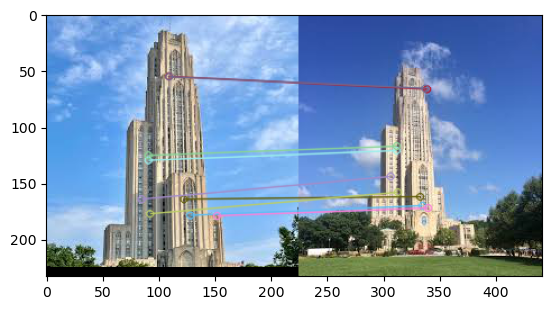

In [32]:
# Draw first 10 matches
img3 = cv2.drawMatches(cathy1, kp1, cathy2, kp2, matches2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3)

In [33]:



# Find fundamental matrix
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)

In [34]:
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
lines1 = lines1.reshape(-1, 3)


In [35]:

def drawlines(img1, img2, lines, pts1, pts2):
    """
    Draw epipolar lines on the images.
    """
    r, c = img1.shape[:2]
    
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2] / r[1]])
        x1, y1 = map(int, [c, -(r[2] + r[0] * c) / r[1]])
        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 1)
    return img1, img2

In [36]:
img1, img2 = drawlines(cathy1, cathy2, lines1, pts1, pts2)

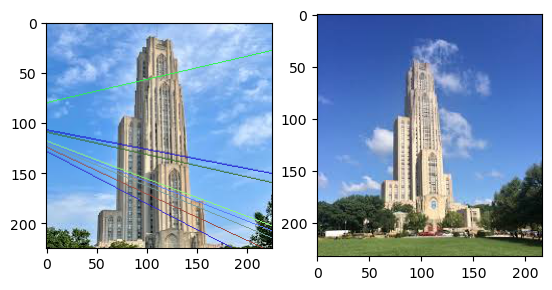

In [37]:
plt.subplot(121); plt.imshow(img1)
plt.subplot(122); plt.imshow(img2)